# Project 4

Problem 1:

a) We have by Ito rule $\int_0^t\dfrac{dS_s}{S_s} = \ln(S_t/s_0) + \dfrac{\sigma^2 t}{2} = rt + \sigma B_t$, therefore
$$
S_t = s_0\exp(rt - \dfrac{\sigma^2 t}{2} + \sigma B_t)
$$

b)Since $\sigma = \sigma(t)$, then we have
$$
S_t = s_0\exp(rt - \int_0^t \dfrac{1}{2}\sigma(s)^2 ds + \int_0^t\sigma(s) dB_s)
$$

c)
We have a European option with payoff h(S_t) at maturity has price at $t$:
$$
\begin{align*}
P (t,S_t) &= \exp(-r(T-t)) E[h(S_T)|S_t] \\
&= \exp(-r(T-t))E[s_0(\exp(rT - \int_0^T \dfrac{1}{2}\sigma(s) ds + \int_0^T\sigma(s) dB_s) - K) \\
&\chi_{s_0\exp(rT - \int_0^T 0.5\sigma(s) ds + \int_0^T\sigma(s) dB_s) > K } ] 
\end{align*}
$$

Problem 2:

a) By Ito rule we have
$$
df(t, B_t) = B_t^2 dt + 2tB_t dB_t + t(dB_t)^2 = (B_t^2 + t)dt + 2tB_t dB_t 
$$

b)
Since we have $<Z_t,B_t> = \rho t$ and $<Z_t> = t$, then by Ito rule we have

\begin{align*}
df(B_t, Z_t) &= Z_t^2 dB_t + 2B_tZ_t dZ_t + Z_t d<B_t,Z_t>\\
& + Z_t d<Z_t,B_t> + B_td<Z_t>\\
& = Z_t^2 dB_t + 2B_TZ_tdZ_t + 2\rho Z_t + B_t
\end{align*}


Problem 3: 
Here is the code for problem 3

[*********************100%***********************]  1 of 1 completed


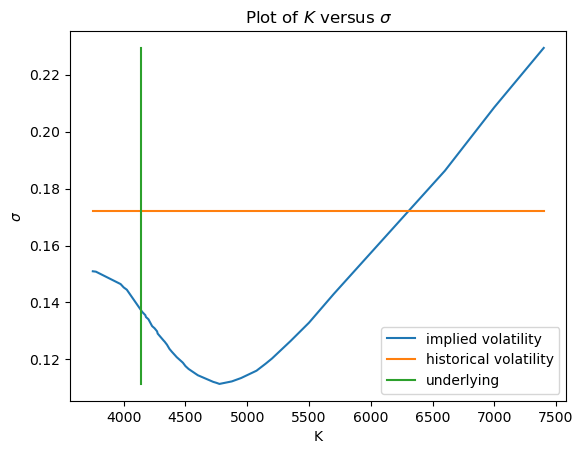

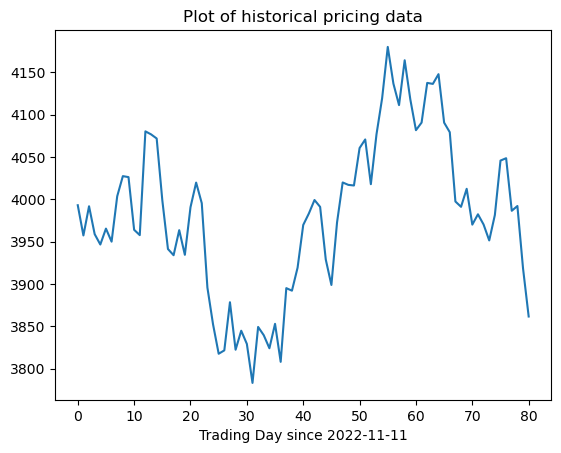

In [10]:
import numpy as np
from scipy.optimize import newton_krylov
from scipy.stats import norm
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import yfinance as yf

def compute_volatility(data, time_size):
    n = data.size
    result = np.zeros((n//time_size,))
    time = np.zeros((n//time_size,))
    i = 0
    for item in np.split(data, n//time_size):
        result[i] = np.sum(np.power(np.log(item[1:]) - np.log(item[:-1]), 2))
        time[i] = (time_size*(i+1) + time_size*i)/2.0
        result[i] = np.sqrt((result[i]/(time_size))*252)
        i += 1



    return result , time

def solve_implied_volatlity(S0, C, r, T, t, K):
    d1 = lambda sigma: (1/(sigma*np.sqrt(T-t)))*(np.log(S0/K) + (r+(sigma**2)/2)*(T-t))
    d2 = lambda sigma: d1(sigma) - sigma*np.sqrt(T-t)

    f = lambda s: (C - norm.cdf(d1(s))*S0 + norm.cdf(d2(s))*K*np.exp(-r*(T-t)))**2
    return minimize_scalar(f, bounds=(0.0001,2), method='bounded').x


data = np.loadtxt("SPX_option.txt")

start_time = '2022-11-11'

yahoo_data = yf.download('^GSPC', start=start_time, end='2023-03-13', interval='1d')

data_past = yahoo_data.loc[:,["Adj Close"]].to_numpy().squeeze()

r = 0.04
T = 123/252
S0 = 4137
t = 0
n,m = data.shape
# print(data.shape)
result = np.zeros((n,))
i = 0
for p in data:
    K, C = p
    result[i] = solve_implied_volatlity(S0, C, r, T, t, K)
    i +=1
vol,_ = compute_volatility(data_past,data_past.size)

res_max = result.max()
res_min = result.min()

plt.figure()
plt.plot(data[:,0],result, label="implied volatility")
plt.plot(data[:,0],[vol]*n, label="historical volatility")
plt.plot([S0,S0],[res_min,res_max],label="underlying")
plt.xlabel("K")
plt.ylabel("$\sigma$")
plt.legend()
plt.title("Plot of $K$ versus $\sigma$")
plt.show()

plt.figure()
plt.plot(np.arange(data_past.size), data_past)
plt.title("Plot of historical pricing data")
plt.xlabel("Trading Day since {}".format(start_time))
plt.show()

From the Figure above we can see that the implied volatility is smaller than historical volatility when K less than about $6300. And the implied volatility is bigger than historical volatility when K > 6300. The implied volatility displays a check mark/smile figure.